# 서비스 제공 국가와 viewpoint 분석

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling

# 데이터 시각화
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib
import plotly.graph_objects as go
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import squarify
import plotly.express as px

# 가설검정
from scipy import stats

# 경고문구 무시
import warnings
warnings.filterwarnings("ignore")
# 자연어 처리
# import spacy

# 빈도수 Count
from collections import Counter


# 정규화
from sklearn.preprocessing import MinMaxScaler

#표준화
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


# 데이터 정보 확인

In [2]:
df=pd.read_csv('./3.1_original_useDf_0714.csv')

In [3]:
df.head(1)

Num            Title  Value Series or Movie  originCountry  Genre  \
0    0  thequeensgambit  44867              TV  United States  Drama   

                                         country_all  countryCount  
0  ['Argentina', 'Australia', 'Belgium', 'Brazil'...            36

In [4]:
# null 값 확인
df.isnull().sum()

Num                  0
Title                0
Value                0
Series or Movie      0
originCountry      206
Genre              370
country_all          0
countryCount         0
dtype: int64

In [5]:
df.describe().round()

Num    Value  countryCount
count  2960.0   2960.0        2960.0
mean   1480.0    634.0          16.0
std     855.0   2202.0          14.0
min       0.0      1.0           1.0
25%     740.0     22.0           3.0
50%    1480.0     80.0          10.0
75%    2219.0    321.0          35.0
max    2959.0  44867.0          37.0

# viewpoint 정규화

## min-max 정규화 실시

In [6]:
min_max_scaler = MinMaxScaler()
value = df[['Value','countryCount']].values

#df['Value_std'] = min_max_scaler.fit_transform(value.reshape(-1,1))
df[['Value_std','countryCount_std']] = min_max_scaler.fit_transform(value)

df.head(1)

Num            Title  Value Series or Movie  originCountry  Genre  \
0    0  thequeensgambit  44867              TV  United States  Drama   

                                         country_all  countryCount  Value_std  \
0  ['Argentina', 'Australia', 'Belgium', 'Brazil'...            36        1.0   

   countryCount_std  
0          0.972222

## 표준화 실시

In [7]:
scaler = StandardScaler()
value2=df[['Value_std','countryCount_std']].values

df[['Value_norm','countryCount_norm']] = scaler.fit_transform(value2)

df.head(1)

Num            Title  Value Series or Movie  originCountry  Genre  \
0    0  thequeensgambit  44867              TV  United States  Drama   

                                         country_all  countryCount  Value_std  \
0  ['Argentina', 'Australia', 'Belgium', 'Brazil'...            36        1.0   

   countryCount_std  Value_norm  countryCount_norm  
0          0.972222   20.089835           1.408727

In [ ]:
df.describe().round()

# 서비스 제공 국가와 viewpoint

## df_service 변수 생성

In [8]:
df_service = df[['Value', 'countryCount']]

In [9]:
df_service.isnull().sum()

Value           0
countryCount    0
dtype: int64

In [10]:
df_service.describe()

Value  countryCount
count   2960.000000   2960.000000
mean     633.733446     16.180405
std     2202.145547     14.071531
min        1.000000      1.000000
25%       22.000000      3.000000
50%       80.000000     10.000000
75%      321.000000     35.000000
max    44867.000000     37.000000

In [11]:
df_service.head(5)

Value  countryCount
0  44867            36
1  42149            36
2  27138            36
3  25729            35
4  23480            36

In [12]:
len(df_service['countryCount'].unique())

37

# 상관성 파악

## 피어스만 상관계수

In [13]:
corr = stats.pearsonr(df_service.Value, df_service.countryCount)
corr

(0.26288429894934123, 5.58007903427901e-48)

In [14]:
df_service.corr(method='pearson')

Value  countryCount
Value         1.000000      0.262884
countryCount  0.262884      1.000000

In [15]:
value = list(df_service.Value)
countryCount=list(df_service.countryCount)

In [16]:
plt.figure(figsize=(10,5),dpi=350)
plt.scatter(countryCount,value, facecolor='white',
            c='crimson' 
            )
plt.xlabel('Number of countries served', labelpad=20)
plt.ylabel('Value', labelpad=20)
#plt.axis([0, 40, 0, 20000]) #구간 설정
plt.show()

In [17]:
sns.set()

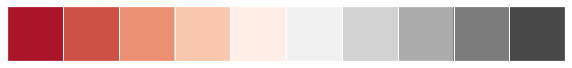

In [18]:
sequential_colors = sns.color_palette("RdGy", 10)
sns.palplot(sequential_colors)

In [19]:
sns.set_palette("RdGy")
ax=sns.lmplot(x='countryCount', y='Value', data=df_service, ci=None)
plt.figure(figsize=(10,10), dpi=350)
ax.xstic
sns.pairplot(df_service, kind='reg', height=6)

AttributeError: 'FacetGrid' object has no attribute 'xstic'

<Figure size 3500x3500 with 0 Axes>

In [20]:
df_service.profile_report()

Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 서비스 제공 국가들과 viewpoint

- 귀무가설 : 서비스제공국가들은 viewpoint에 영향이 없다.
- 대립가설 : 서비스제공국가들은 viewpoint에 영향이 있다.

In [21]:
serviceCountry=df[['Num','Value','country_all']]

In [22]:
serviceCountry.head(1)

Num  Value                                        country_all
0    0  44867  ['Argentina', 'Australia', 'Belgium', 'Brazil'...

In [23]:
serviceCountry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2960 entries, 0 to 2959
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Num          2960 non-null   int64 
 1   Value        2960 non-null   int64 
 2   country_all  2960 non-null   object
dtypes: int64(2), object(1)
memory usage: 69.5+ KB


In [24]:
serviceCountry.sort_values('Num',ascending=True, inplace=True)

## 영화 순위 top 20의 service country들을 country_single로 만듦

In [25]:
view_top20=serviceCountry[:][:20]

In [26]:
view_top20.set_index('Num', inplace=True)
view_top20.head(2)

Value                                        country_all
Num                                                          
0    44867  ['Argentina', 'Australia', 'Belgium', 'Brazil'...
1    42149  ['Argentina', 'Australia', 'Belgium', 'Brazil'...

In [27]:
type(view_top20.Value)

pandas.core.series.Series

In [28]:
view_top20.country_all[1].split(',')

["['Argentina'",
 " 'Australia'",
 " 'Belgium'",
 " 'Brazil'",
 " 'Canada'",
 " 'Colombia'",
 " 'Czech Republic'",
 " 'France'",
 " 'Germany'",
 " 'Greece'",
 " 'Hong Kong'",
 " 'Hungary'",
 " 'Iceland'",
 " 'India'",
 " 'Israel'",
 " 'Italy'",
 " 'Japan'",
 " 'Lithuania'",
 " 'Malaysia'",
 " 'Mexico'",
 " 'Netherlands'",
 " 'Poland'",
 " 'Portugal'",
 " 'Romania'",
 " 'Russia'",
 " 'Singapore'",
 " 'Slovakia'",
 " 'South Africa'",
 " 'South Korea'",
 " 'Spain'",
 " 'Sweden'",
 " 'Switzerland'",
 " 'Thailand'",
 " 'Turkey'",
 " 'United Kingdom'",
 " 'United States']"]

In [29]:
result_ALL_country = serviceCountry['country_all']
result_ALL_country = result_ALL_country.apply(lambda x: pd.Series(x))
result_ALL_country = result_ALL_country.stack().reset_index(level=1, drop=True).to_frame('country_single')
result_ALL_country=result_ALL_country.reset_index()

In [30]:
result_ALL_country

index                                     country_single
0         0  ['Argentina', 'Australia', 'Belgium', 'Brazil'...
1         1  ['Argentina', 'Australia', 'Belgium', 'Brazil'...
2         2  ['Argentina', 'Australia', 'Belgium', 'Brazil'...
3         3  ['Argentina', 'Australia', 'Belgium', 'Brazil'...
4         4  ['Argentina', 'Australia', 'Belgium', 'Brazil'...
...     ...                                                ...
2955   2955  ['Argentina', 'Australia', 'Belgium', 'Brazil'...
2956   2956  ['Canada', 'Czech Republic', 'Hungary', 'Roman...
2957   2957              ['Germany', 'India', 'United States']
2958   2958  ['Argentina', 'Australia', 'Brazil', 'Canada',...
2959   2959  ['Argentina', 'Australia', 'Brazil', 'Canada',...

[2960 rows x 2 columns]

In [ ]:
country_counter=Counter(result_ALL_country.country_single)

In [ ]:
country_counter